<a href="https://colab.research.google.com/github/ustab/BTK-PythonTensorflow/blob/master/EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start by importing the necessary libraries for this lab.

In [50]:
!sudo chown -R jupyter:jupyter /home/jupyter/training-data-analyst

chown: invalid user: ‘jupyter:jupyter’


In [51]:
# Install Sklearn
!python3 -m pip install --user sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
# Ensure the right version of Tensorflow is installed.
!pip freeze | grep tensorflow==2.1 || pip install tensorflow==2.1

tensorflow==2.1.0


**Note:** After executing the above cell you will see the output
`tensorflow==2.1.0` that is the installed version of tensorflow.

In [57]:
import os
import tensorflow.keras

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


In [59]:
from tensorflow import feature_column as fc
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [61]:
#from keras.utils.vis_utils import plot_model

In [56]:
print("TensorFlow version: ",tf.version.VERSION)

TensorFlow version:  2.1.0


In [62]:
movies_df=pd.read_csv('/content/tmdb_5000_movies.csv')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [63]:
dfc=pd.read_csv('/content/tmdb_5000_credits.csv')
dfc.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [64]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [65]:
#first step is to clean the data and see which are the redundant or unnecessary cols

del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 
                'overview', 'production_companies', 'original_title', 'title']

movies_df = movies_df.drop(del_col_list, axis = 1 )
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124


In [66]:
movies_df.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count'],
      dtype='object')

In [67]:
movies_df.isnull().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
vote_average            0
vote_count              0
dtype: int64

In [68]:
#  dropping the duplicates from the dataset.
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep='first')
print(movies_df.shape)

(4803, 11)
(4803, 11)


In [69]:
import numpy as np

In [70]:
# replacing all the zeros from revenue and budget cols.

cols = ['budget', 'revenue']
movies_df[cols] = movies_df[cols].replace(0, np.nan)

# dropping all the rows with na in the columns mentioned above in the list.
movies_df.dropna(subset=cols, inplace=True)
movies_df.shape

(3229, 11)

In [71]:
# Changing the release_date column to DateTime column
movies_df.release_date = pd.to_datetime(movies_df['release_date'])
# To answer the last question, we'll have to extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,2007
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,2015
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,2012
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,2012


In [72]:
# Changing the data type of the below mentioned columns and 
change_cols=['budget', 'revenue']
#changing data type
movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

In [73]:
import json

In [74]:
from pandas.io.json import json_normalize
json_normalize(movies_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


""
0
1
2
3
4
5
6
7
8
9


In [75]:
import requests

In [81]:
movies_df.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'release_year'],
      dtype='object')

In [82]:
# we see that there are columns which are in json format,
# let's flatten these json data into easyily interpretable lists

def parse_col_json(column, key):
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)


In [ ]:
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

In [85]:
# Changing the release_date column to DateTime column
movies_df.release_date = pd.to_datetime(movies_df['release_date'])
# To answer the last question, we'll have to extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"['English', 'Español']",7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,['English'],6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,['English'],7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,['English'],6.1,2124,2012


In [86]:
# Changing the data type of the below mentioned columns and 
change_cols=['budget', 'revenue']
#changing data type
movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

In [89]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
  

In [ ]:
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

In [91]:
# Answer to question #1.
# To find out the most expensive movies, we need to look at the budget set for them which is an indicator of expense.
expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
expensive_movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-05-14,1045713802,136.0,"['English', 'Español']",6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,['English'],6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,['English'],7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",5.4,1400,2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,['English'],6.1,2124,2012


In [92]:
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 movies dataframe in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 movies dataframe
    """
    
    top = movies_df[col].idxmax()
    top_df = pd.DataFrame(movies_df.loc[top])
    
    bottom = movies_df[col].idxmin()
    bottom_df = pd.DataFrame(movies_df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('budget')

,17,4238
budget,380000000,1
genres,"['Adventure', 'Action', 'Fantasy']","['Drama', 'Comedy']"
id,1865,3082
popularity,135.413856,28.27648
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
release_date,2011-05-14 00:00:00,1936-02-05 00:00:00
revenue,1045713802,8500000
runtime,136.0,87.0
spoken_languages,"['English', 'Español']",['English']
vote_average,6.4,8.1


In [93]:
movies_df.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'release_year'],
      dtype='object')

In [94]:
# to find the most profitable movies, we need to find who made the most 
# amount after deducting the budget from the revenue generated.

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = ['budget',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
        'release_year',
         'runtime',
         'spoken_languages',
         'vote_average',
         'vote_count']
movies_df = movies_df[cols]
movies_df.sort_values(by = ['budget'], ascending=False).head()

,budget,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,vote_average,vote_count
17,380000000,1045713802,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-05-14,2011,136.0,"['English', 'Español']",6.4,4948
1,300000000,961000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,2007,169.0,['English'],6.9,4500
7,280000000,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,2015,141.0,['English'],7.3,6767
10,270000000,391081192,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,2006,154.0,"['English', 'Français', 'Deutsch']",5.4,1400
4,260000000,284139100,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2012,132.0,['English'],6.1,2124


In [95]:
# to find the most talked about movies, we can sort the dataframe on the popularity column
popular_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
popular_movies_df.head()

,budget,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,vote_average,vote_count
17,380000000,1045713802,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-05-14,2011,136.0,"['English', 'Español']",6.4,4948
1,300000000,961000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,2007,169.0,['English'],6.9,4500
7,280000000,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,2015,141.0,['English'],7.3,6767
10,270000000,391081192,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,2006,154.0,"['English', 'Français', 'Deutsch']",5.4,1400
4,260000000,284139100,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2012,132.0,['English'],6.1,2124


In [96]:
# in terms of runtime
# Average runtime of movies
movies_df['runtime'].mean()
# comparison
find_min_max_in('runtime')

,2384,3626
budget,18000000,5000000
revenue,871279,4074023
genres,"['Crime', 'Drama', 'Thriller', 'History']",['Documentary']
id,43434,78394
popularity,1.138383,4.498368
production_countries,"[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso..."
release_date,2010-05-19 00:00:00,2010-05-14 00:00:00
release_year,2010,2010
runtime,338.0,41.0
spoken_languages,"['Français', 'Deutsch', 'English', 'Español', ...",['English']


In [97]:
# movies rated above 7 

movies_df[movies_df['vote_average'] >= 7.0]

,budget,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,vote_average,vote_count
0,237000000,2787965087,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2009,162.0,"['English', 'Español']",7.2,11800
3,250000000,1084939099,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,2012,165.0,['English'],7.6,9106
6,260000000,591794936,"['Animation', 'Family']",38757,48.681969,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,2010,100.0,['English'],7.4,3330
7,280000000,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,2015,141.0,['English'],7.3,6767
8,250000000,933959197,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,2009,153.0,['English'],7.4,5293
...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,6706368,"['Documentary', 'History']",1779,3.284903,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1989-09-01,1989,91.0,['English'],7.4,90
4724,10000,7000000,"['Drama', 'Fantasy', 'Horror', 'Science Fiction']",985,20.399578,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1977-03-19,1977,89.0,['English'],7.5,485
4738,60000,3221152,"['Mystery', 'Drama', 'Thriller']",473,27.788067,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-07-10,1998,84.0,['English'],7.1,586
4773,27000,3151130,['Comedy'],2292,19.748658,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,1994,92.0,['English'],7.4,755


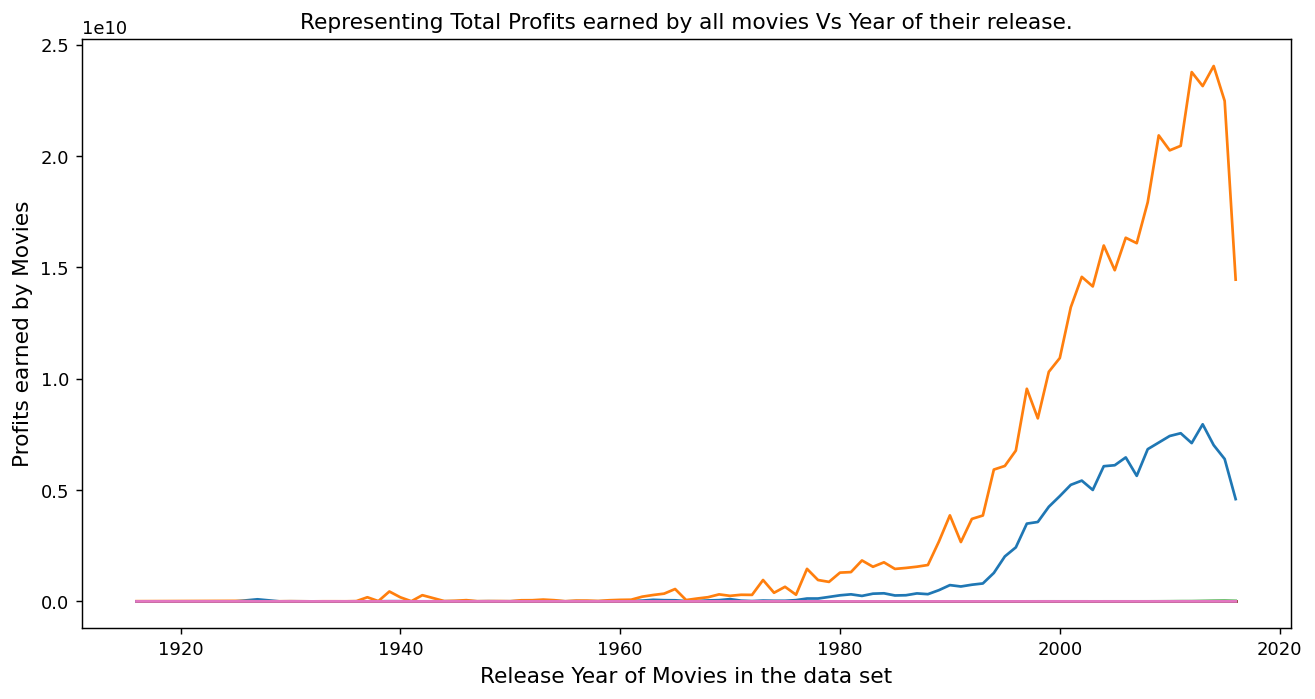

In [101]:
profits_year = movies_df.groupby('release_year').sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [102]:
# Most profitable year from the given dataset.

profits_year.idxmax()

budget          2013
revenue         2014
id              2015
popularity      2014
runtime         2011
vote_average    2011
vote_count      2013
dtype: int64